In [12]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [20]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model
    ### END CODE HERE ###
    
    return model

In [21]:
happyModel = HappyModel(X_train.shape[1:])

In [22]:
happyModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

In [23]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d_7 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation_6 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 32, 32, 32)        0         
                                                        

In [24]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
12/12 [==============================] - 10s 29ms/step - loss: 2.0737 - accuracy: 0.5633
Epoch 2/40
12/12 [==============================] - 0s 16ms/step - loss: 0.5600 - accuracy: 0.7583
Epoch 3/40
12/12 [==============================] - 0s 15ms/step - loss: 0.2447 - accuracy: 0.9067
Epoch 4/40
12/12 [==============================] - 0s 15ms/step - loss: 0.1593 - accuracy: 0.9450
Epoch 5/40
12/12 [==============================] - 0s 15ms/step - loss: 0.1330 - accuracy: 0.9517
Epoch 6/40
12/12 [==============================] - 0s 14ms/step - loss: 0.1207 - accuracy: 0.9650
Epoch 7/40
12/12 [==============================] - 0s 16ms/step - loss: 0.1162 - accuracy: 0.9583
Epoch 8/40
12/12 [==============================] - 0s 15ms/step - loss: 0.0854 - accuracy: 0.9733
Epoch 9/40
12/12 [==============================] - 0s 15ms/step - loss: 0.0717 - accuracy: 0.9867
Epoch 10/40
12/12 [==============================] - 0s 14ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 11

In [25]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 15ms/step - loss: 0.0981 - accuracy: 0.9533

Loss = 0.09809255599975586
Test Accuracy = 0.95333331823349


[[0.]]


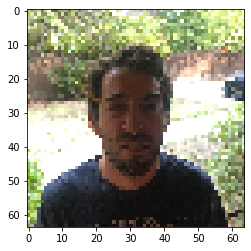

In [26]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))